In [1]:
import pandas as pd
import numpy as np

С https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv скачал датасет "прогнозирования сердечной недостаточности"

In [35]:
heart_failure = pd.read_csv('C:/Projects/Netology/Homeworks/heart.csv',)
heart_failure.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Узнаем количество пустых строк в данных

In [7]:
heart_failure.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

Проанализируем, пожалуй самое очевидное, зависимость от пола. 

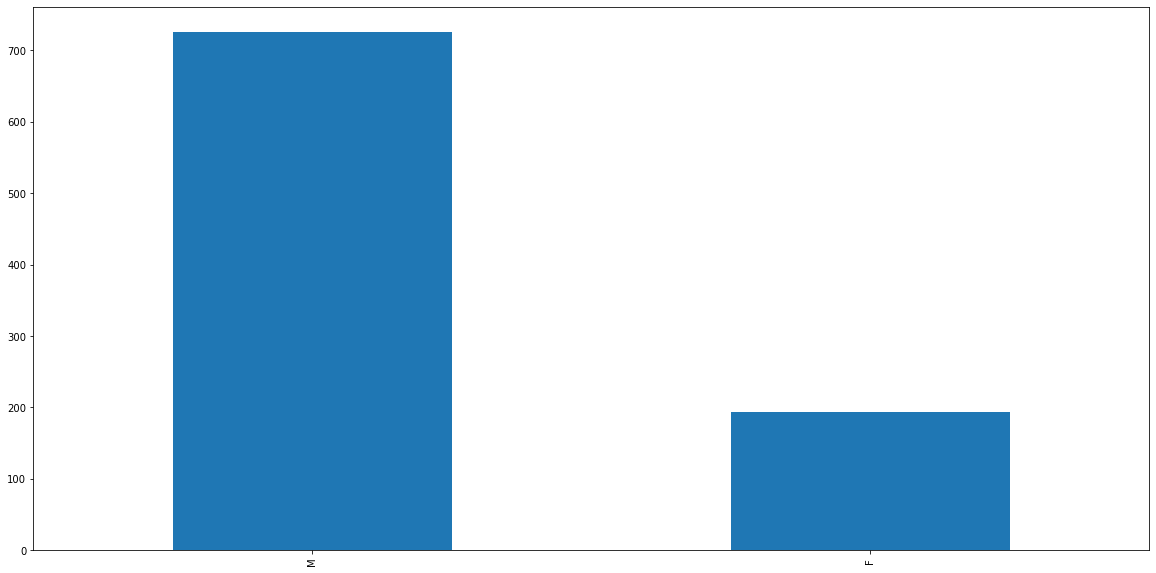

In [11]:
heart_failure['Sex'].value_counts().plot(kind='bar');

Как мы видим мужчины гораздо сильнее подвержены сердечной недостаточности, чем женщины. Хотя почти четырехкратный перевес для меня неожиданность. Думаю, что можно предположить, что это связано с образм жизни и особенностью нервной системы мужчин.

Теперь с помощью инструмента библиотеки seaborn посмотрим, как разные метрики коррелируют между собой. Речь идет о линейной корреляции

In [24]:
import seaborn as sns

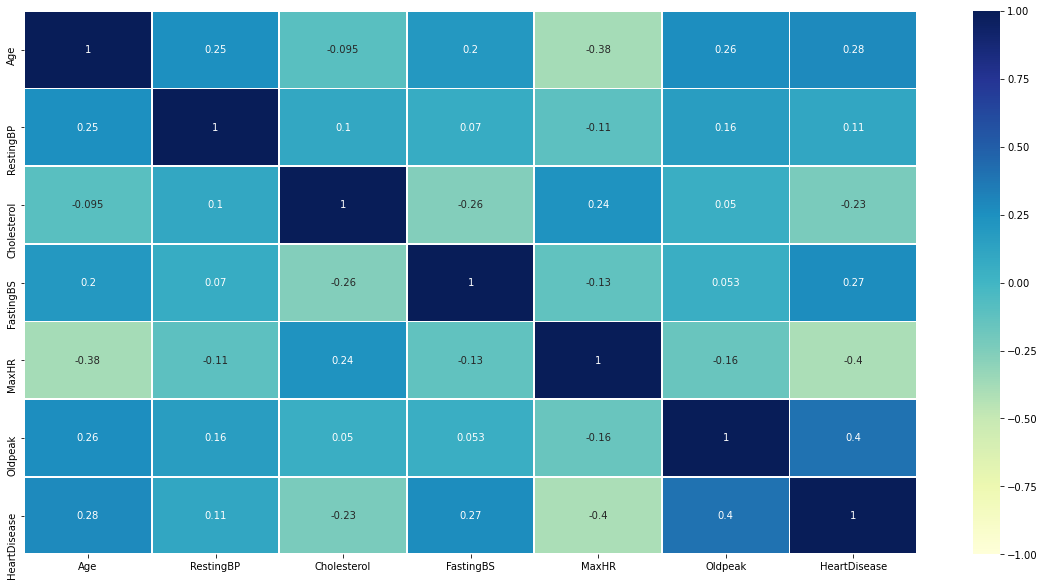

In [30]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(heart_failure.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

Как видим из таблицы линейной зависимости нет нигде. Но самым влияющим фактором является наличие депресии (Oldpeak: oldpeak = ST [Numeric value measured in depression]). Затем идут возраст и наличие сахара в крови (FastingBS: fasting blood sugar).

Хотя возраст не является ключивым фактором, всё же интересно посмотреть, как распределяется количество случаев сердечной недостаточности.

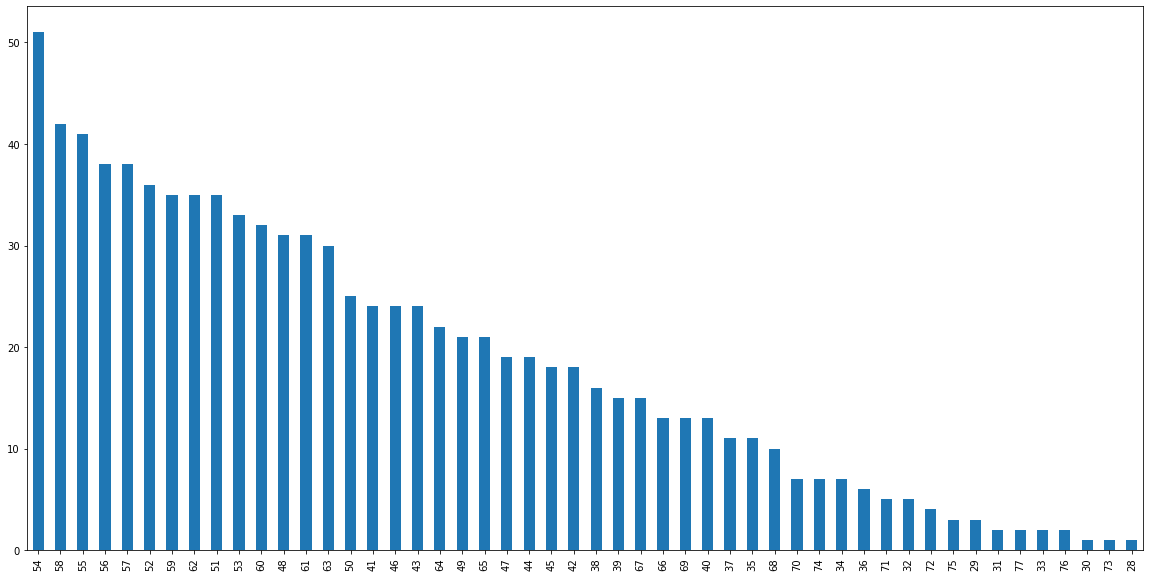

In [34]:
heart_failure['Age'].value_counts().plot(kind='bar');

Из визуализации видно, что наиболее подверженной риску группой являются люди от 50 до 60 лет. Более старшие люди видимо уже не доживают, чтобы попадать в статистику, а у младших пока еще всё хорошо со здоровьем, чтобы жаловаться. 

Для наглядности построим ящик с усами.

<AxesSubplot:title={'center':'Распределение по возрасту'}>

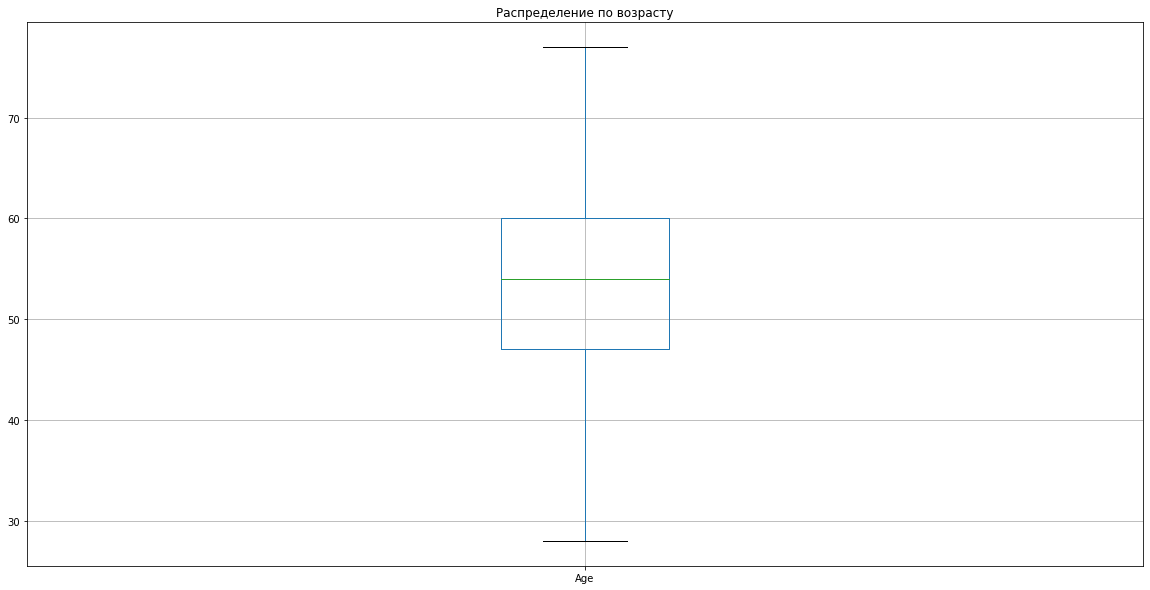

In [42]:
heart_failure[['Age']].plot(kind='box',
                                        title='Распределение по возрасту', grid=True)

Давайте посмотрим на связь возраста и давления.

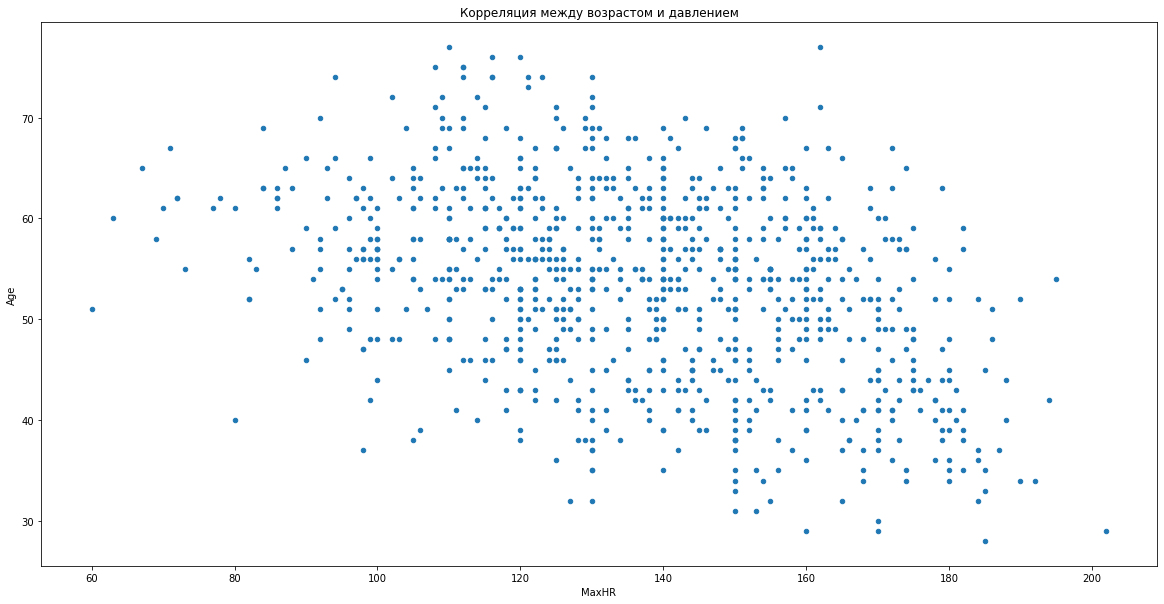

In [38]:
heart_failure.plot(kind='scatter', 
        x='MaxHR', 
        y='Age', 
        title='Корреляция между возрастом и давлением')
plt.show()

Из распределения видно, что большее количество случаев опять попадает в возраст от 50 до 60. Видимо нужно раньше задумываться о здоровье. Так как до этого возраста видимо люди не так часто проводят обследования, выявляя потенциальные риски.